In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



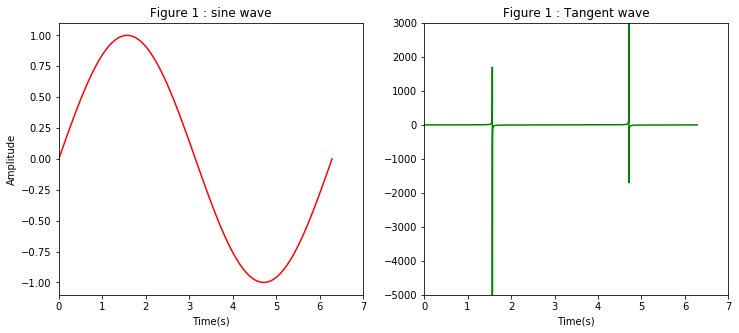

In [36]:
f = plt.figure(figsize=(12,5))

#plt.title("Figure with Subplots")

ax1 = f.add_subplot(121)
ax1.set(title = "Figure 1 : sine wave", xlabel = "Time(s)", ylabel = "Amplitude")


X = np.linspace(0, 2 * np.pi, 100, endpoint=True)
Sine = np.sin(X)
plt.xlim(0,7)
plt.xticks(np.linspace(0,7,8,endpoint=True))
plt.plot(A, Sine, color="red")

ax2 = f.add_subplot(122)
ax2.set(title = "Figure 1 : Tangent wave", xlabel = "Time(s)")


Y = np.linspace(0, 2 * np.pi,8000, endpoint=True)
Tang= np.tan(Y)
plt.xlim(0,7)
plt.ylim(-5000,3000)
plt.xticks(np.linspace(0,7,8,endpoint=True))
plt.plot(B, Tang, color="green")


plt.show()

#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


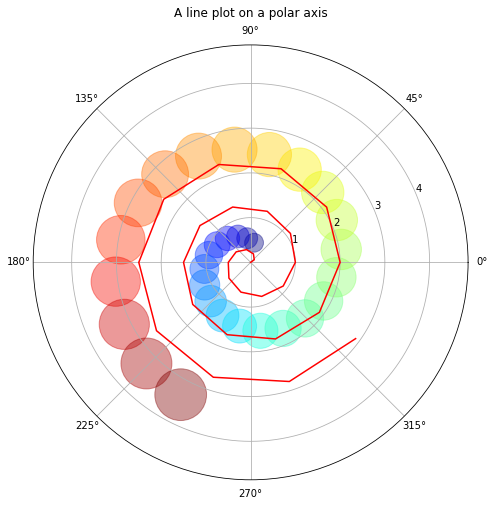

In [82]:
import numpy as np
from matplotlib.pyplot import figure, show, rc
import random

r = np.arange(0, 3, 0.1)
theta = 2 * np.pi * r
fig = figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar',facecolor='white')
ax.plot(theta, r,'r')

ax.set_title("A line plot on a polar axis")
sp= r + np.random.uniform(-0.5,0.5)
theta_dot= np.pi * sp
area_dot= 800 *(sp)
colors_dot= theta_dot
ax.set_rmax(2.5)

c=ax.scatter(theta_dot, sp, c=colors_dot, s=area_dot, cmap='jet', alpha=0.4)

plt.show()

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


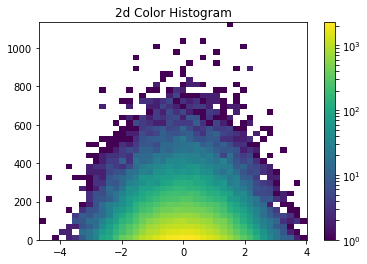

In [11]:
from matplotlib.colors import LogNorm
x = np.random.randn(100000)
y = np.random.geometric(0.01, size=100000)

plt.hist2d(x,y, bins=40,norm=LogNorm())
plt.colorbar()
plt.title('2d Color Histogram')
plt.show()

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


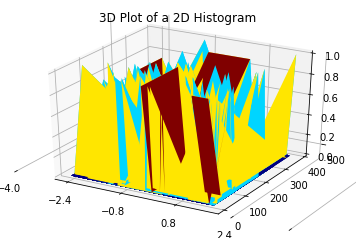

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3D Plot of a 2D Histogram")

x = np.random.randn(100)
y = np.random.geometric(0.01, size=100)

z= np.histogram2d(x, y, bins=(100,100))

X,Y = np.meshgrid(x,y)
a=z[0]

plt.xticks(np.linspace(-4,4,6,endpoint=True))
plt.yticks(np.linspace(0,500,6,endpoint=True))

ax.plot_surface(X,Y,a,rstride=1,cstride=1,cmap=plt.cm.jet)
plt.show()

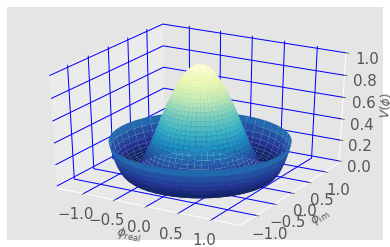

In [170]:
#Demonstrates plotting a surface defined in polar coordinates.
#Uses the reversed version of the YlGnBu color map.
#Also demonstrates writing axis labels with latex math mode.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

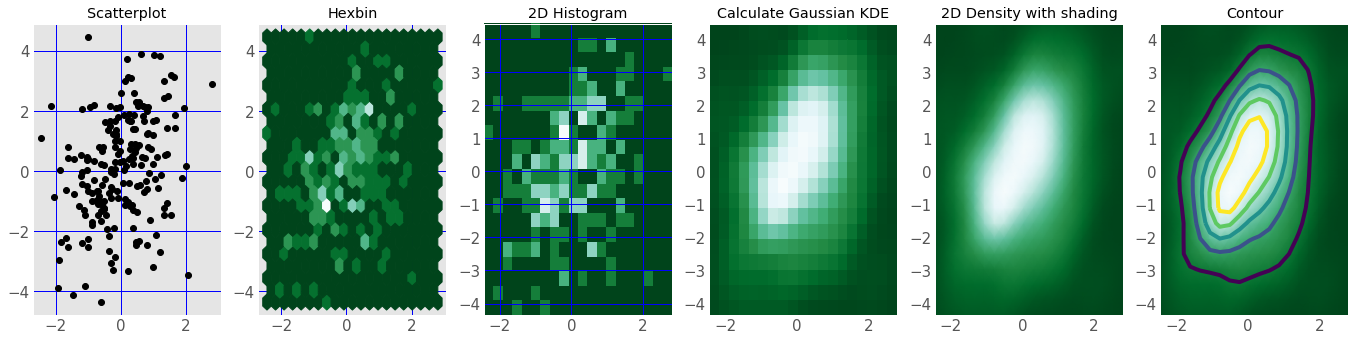

In [174]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


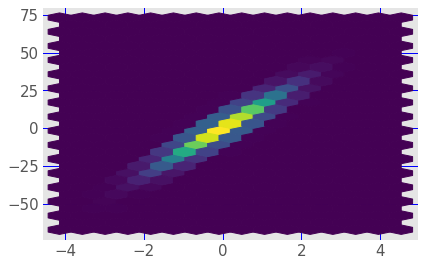

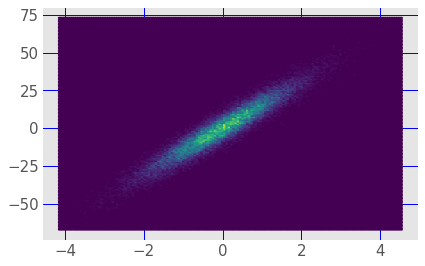

In [175]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.normal(size=50000)
y = (x * 3 + np.random.normal(size=50000)) * 5
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()


**References:**
    
https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/

https://matplotlib.org/gallery.html

        